In [1]:
#importing general packages

# for df and stats
import seaborn as sns
import pandas as pd
import numpy as np

#for data visualize
import matplotlib.pyplot as plt


#for models works
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#other imports
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#loading data from preloaded iris datasets 

from sklearn.datasets import load_iris

In [3]:
#store it in a variable

iris = load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
#lets understand the data

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
#lets view the features name
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
#target names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [8]:
#lets insert into dataframe

iris_data = pd.DataFrame(iris.data)

In [9]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
#we see we have no column names.. so lets load the data and add the column names which is store in variable feature_names

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [11]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
#lets load the target data
#we have to rename the target column as column name is an int.
#method 1 .. load the data and name the column

iris_target = pd.DataFrame(iris.target, columns=['target'])

In [13]:
iris_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
#or method 2. load the data and rename the column
method_2 = pd.DataFrame(iris.target)
method_2.head(2)

,0
0,0
1,0


In [15]:
#renaming column

method_2 = method_2.rename(columns={0 : 'target'})
method_2.head(2)

,target
0,0
1,0


In [16]:
#to make it easy to understand, lets store all data to X,y variables

X = iris_data
y = iris_target

In [17]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
y.describe()

,target
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


In [19]:
#lets combine the data frame so we will have a general view and also do some EDA and visuals

iris_dataset = pd.concat([X,y], axis=1)
iris_dataset.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
#lets see all columns datatype

iris_dataset.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [21]:
#when exploring data also search for missing data -- nan values
#we can do this by returning all rows with missing values or we can see the columns with total of missing values

In [22]:
#method 1

iris_dataset.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [23]:
#method 2
iris_dataset[iris_dataset.isnull().any(axis=1)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [24]:
#stats over-view of the dataset
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [25]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
iris_dataset.shape

(150, 5)

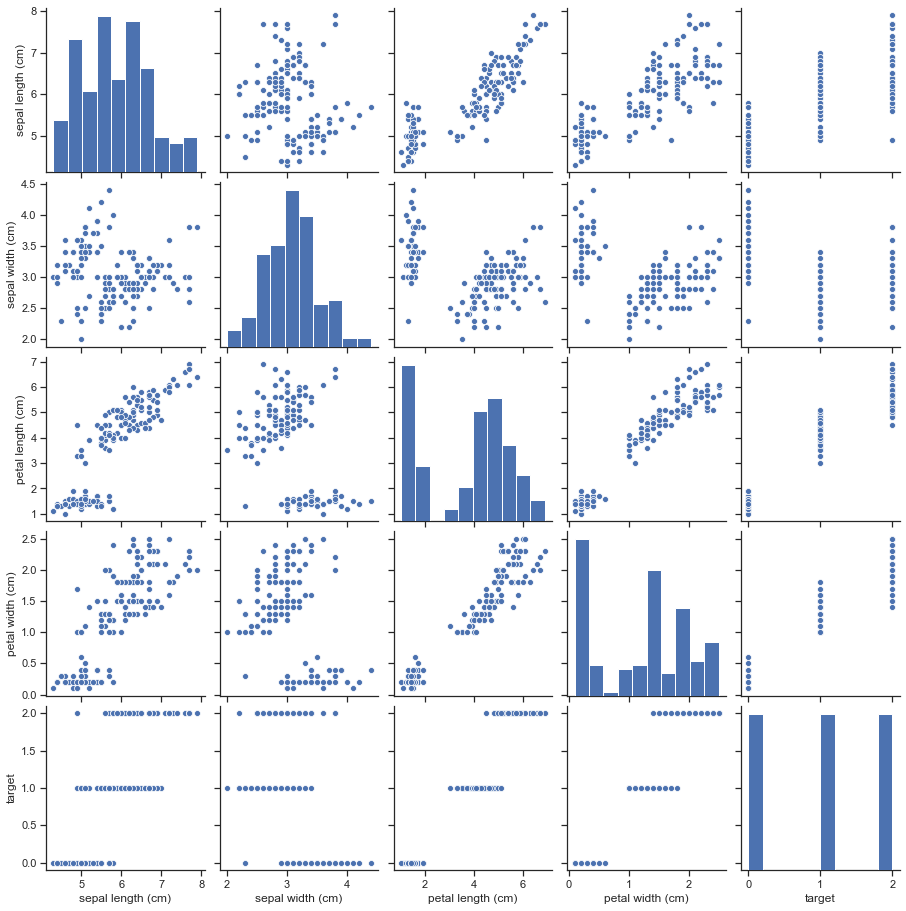

In [27]:
#overall-view of the dataset
sns.set(style='ticks', color_codes=True)
sns.pairplot(iris_dataset);

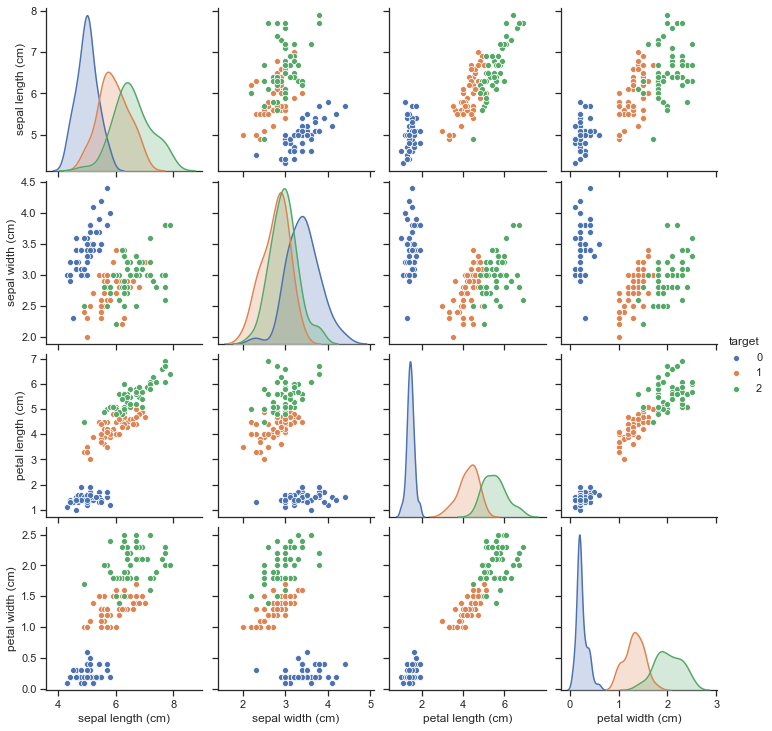

In [28]:
#targets
sns.pairplot(iris_dataset, hue='target');

In [29]:
#lets understand what the values means -- 0, 1, 2
#lets view the names so we know which is which

iris_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [30]:
#names of these values
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [31]:
#lets create a dictionary for the map

Species = {0:'setosa', 1:'versicolor', 2:'virginica'}

In [32]:
#now lets map it

iris_dataset['species'] = iris_dataset.target.map(Species)

In [33]:
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


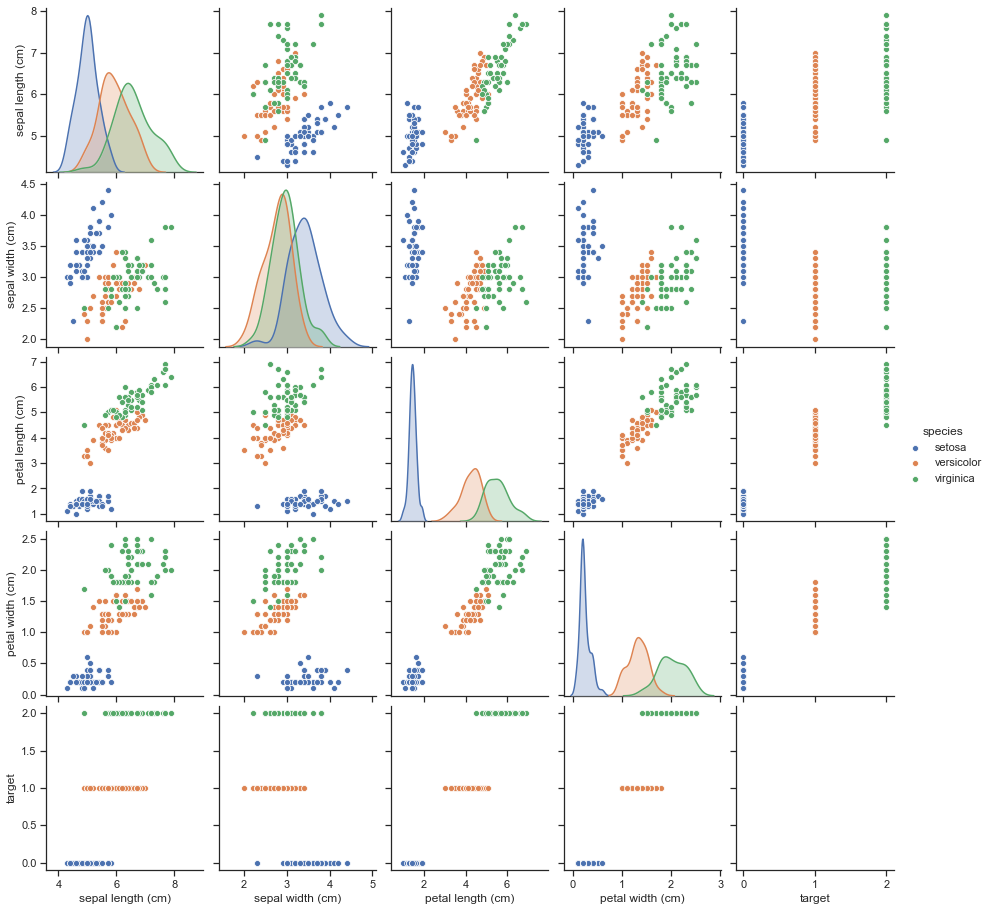

In [34]:
#now let us plot again to see values names not int
sns.pairplot(iris_dataset, hue='species');

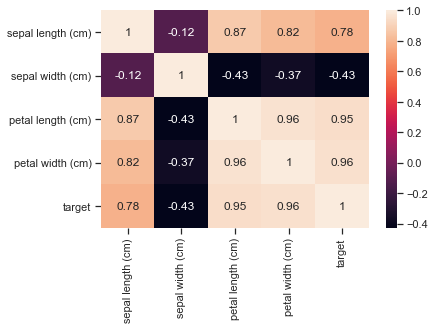

In [35]:
#lets use heatmap to see correlation -- heatmap is used to find out the correlation between different
#features in dataset. high positive or negative values shows that the features being viewed have 
#high correlation. Helps in selecting parameters for ML

sns.heatmap(iris_dataset.corr(), annot=True);

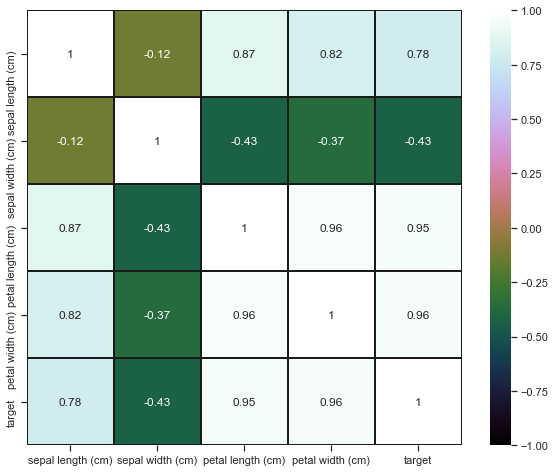

In [36]:
fig =plt.gcf()
fig.set_size_inches(10,8)
fig=sns.heatmap(iris_dataset.corr(), annot=True, cmap='cubehelix', cbar_kws={'orientation':'vertical'}, cbar=True, mask=False,
               linewidths=1, linecolor='k', square=True, vmin=-1, vmax=1)

In [37]:
#findings : the petal lenghth / width has the most correlation with target. this means that these features should be
#most considered when deciding the class of the flower while sepal width way outside the corr.

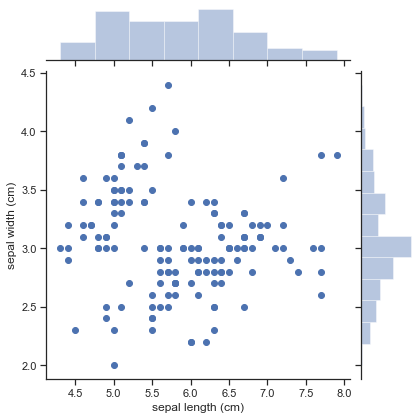

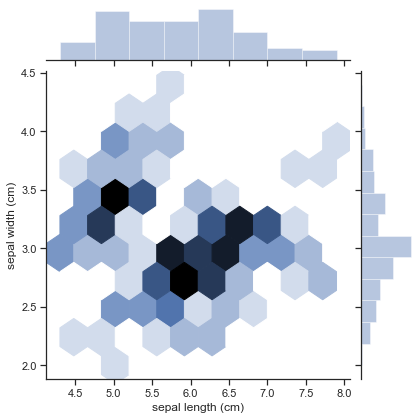

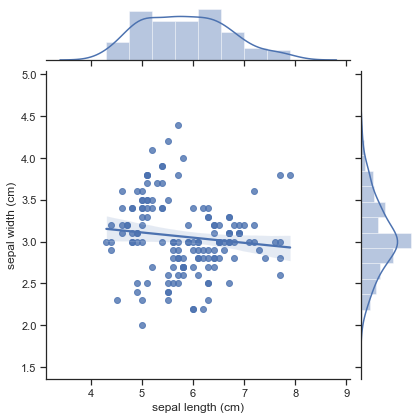

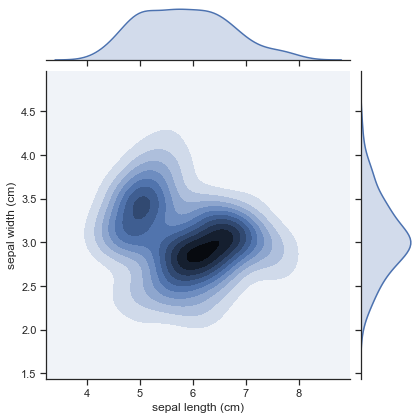

In [38]:
#lets look at relationship btw sepalwidth and sepallength
#using seaborn and displaying various kinds
xgraph = 'sepal length (cm)'
ygraph = 'sepal width (cm)'
fig=sns.jointplot(xgraph, ygraph, data=iris_dataset)
fig=sns.jointplot(xgraph, ygraph, data=iris_dataset, kind='hex')
fig=sns.jointplot(xgraph, ygraph, data=iris_dataset, kind='reg')
fig=sns.jointplot(xgraph, ygraph, data=iris_dataset, kind='kde')

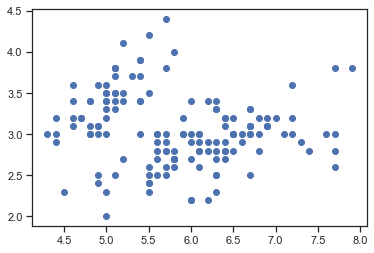

In [39]:
#using matplotlib
plt.scatter(iris_dataset['sepal length (cm)'], iris_dataset['sepal width (cm)'])
plt.show()

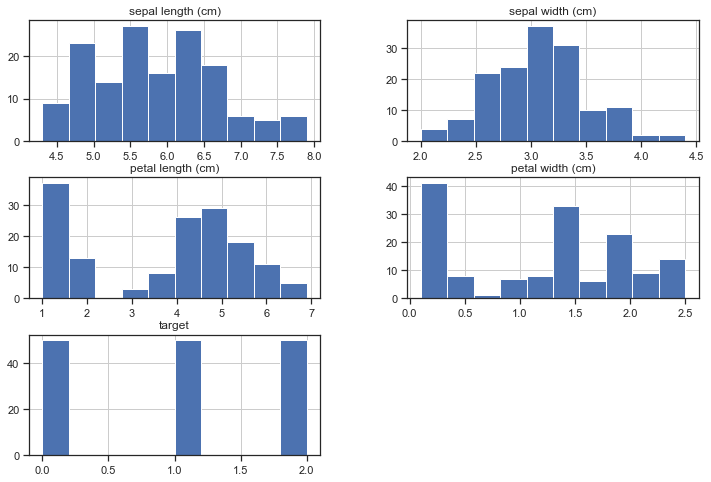

In [40]:
#lets look at the distribution of data
iris_dataset.hist()
fig=plt.gcf()
fig.set_size_inches(12,8)

In [41]:
#well lets get straight to business and build our models

In [42]:
#first logisticRegression model
#lets define our variables 
X = iris_data
y = iris_target




In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify = y)

In [44]:
#lets see the segments our data has been splitted into

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [45]:
#lets standardX the X values into standard scale -- 

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
iris_dataset.target.value_counts(normalize= True)

2    0.333333
1    0.333333
0    0.333333
Name: target, dtype: float64

In [46]:
#now lets initialize our model --- WE USING LogisticRegression first

LReg = LogisticRegression()

In [47]:
#now lets fit our train data with the model

LReg.fit(X_train, y_train)

LogisticRegression()

In [48]:
LReg.score(X_test, y_test)

0.9666666666666667

In [49]:
#lets test it

y_test.head(5)

,target
107,2
9,0
98,1
11,0
43,0


In [50]:
#let us predict it using the model
x_pred = LReg.predict(X_test)
x_pred

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])

In [51]:
b = x_pred

In [52]:
#our model predicted right

In [53]:
y_test['predictions'] = x_pred

In [54]:
df_iris_pred = pd.merge(iris_dataset,y_test[['predictions']],how = 'left',left_index = True, right_index = True)

In [55]:
#view our pred and compare -- method 1 but long process
#df_iris_pred.sort_values(['target', 'predictions'], ascending=[True, True])

In [56]:
#now lets print all dataframe and view our predictions and compare -- better opt
array = [0,1,2]
df_iris_pred.loc[df_iris_pred['predictions'].isin(array)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,predictions
0,5.1,3.5,1.4,0.2,0,setosa,0.0
5,5.4,3.9,1.7,0.4,0,setosa,0.0
8,4.4,2.9,1.4,0.2,0,setosa,0.0
9,4.9,3.1,1.5,0.1,0,setosa,0.0
11,4.8,3.4,1.6,0.2,0,setosa,0.0
12,4.8,3.0,1.4,0.1,0,setosa,0.0
15,5.7,4.4,1.5,0.4,0,setosa,0.0
16,5.4,3.9,1.3,0.4,0,setosa,0.0
37,4.9,3.6,1.4,0.1,0,setosa,0.0
43,5.0,3.5,1.6,0.6,0,setosa,0.0


In [57]:
from sklearn.datasets import make_classification

In [58]:
#lets try another model RandomForestClassifier
xi = iris_data
yi = iris_target

In [59]:
#initialize the model
rFC = RandomForestClassifier()

In [60]:
#lets split data into 80/20 -- train and test accordingly
xi_train, xi_test, yi_train, yi_test = train_test_split(xi,yi, test_size=0.2)

In [61]:
#lets train the model with our training data

rFC.fit(xi_train, yi_train)

RandomForestClassifier()

In [62]:
#lets check the performance

rFC.score(xi_test,yi_test)

0.9333333333333333

In [63]:
xi_pred = rFC.predict(xi_test)
xi_pred

array([0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 2, 2, 0])

In [64]:
yi_test

,target
1,0
71,1
67,1
74,1
115,2
55,1
137,2
102,2
68,1
52,1


In [65]:
#used RandomFR
yi_test['predictR'] = xi_pred
df_iris_pred2 = pd.merge(iris_dataset,yi_test[['predictR']],how = 'left',left_index = True, right_index = True)
df_iris_pred2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,predictR
0,5.1,3.5,1.4,0.2,0,setosa,NaN
1,4.9,3.0,1.4,0.2,0,setosa,0.0
2,4.7,3.2,1.3,0.2,0,setosa,NaN
3,4.6,3.1,1.5,0.2,0,setosa,NaN
4,5.0,3.6,1.4,0.2,0,setosa,NaN
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,2.0
146,6.3,2.5,5.0,1.9,2,virginica,NaN
147,6.5,3.0,5.2,2.0,2,virginica,NaN
148,6.2,3.4,5.4,2.3,2,virginica,NaN


In [66]:
#well lets get clear view
array = [0,1,2]
df_iris_pred2.loc[df_iris_pred2['predictR'].isin(array)]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,predictR
1,4.9,3.0,1.4,0.2,0,setosa,0.0
14,5.8,4.0,1.2,0.2,0,setosa,0.0
18,5.7,3.8,1.7,0.3,0,setosa,0.0
26,5.0,3.4,1.6,0.4,0,setosa,0.0
30,4.8,3.1,1.6,0.2,0,setosa,0.0
34,4.9,3.1,1.5,0.2,0,setosa,0.0
45,4.8,3.0,1.4,0.3,0,setosa,0.0
49,5.0,3.3,1.4,0.2,0,setosa,0.0
52,6.9,3.1,4.9,1.5,1,versicolor,1.0
53,5.5,2.3,4.0,1.3,1,versicolor,1.0


In [67]:
# lets use another model KNeighborsClassifier
xii = iris_data
yii = iris_target

In [68]:
#lets do the normal thing
xii_train, xii_test, yii_train, yii_test = train_test_split(xii,yii, test_size=0.2, random_state=30, stratify=yii)

In [69]:
#lets iniatialize our model
kNC = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [70]:
#lets train our model using our training dataset
kNC.fit(xii_train, yii_train)

KNeighborsClassifier()

In [71]:
#lets predict our xii_test using our model
k_xpred = kNC.predict(xii_test)
k_xpred

array([2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 0,
       1, 1, 1, 1, 2, 2, 0, 2])

In [72]:
yii_test.head(6)

,target
107,2
113,2
37,0
64,1
79,1
2,0


In [73]:
#lets check the score
print(accuracy_score(k_xpred, yii_test))

0.9333333333333333


In [74]:
#score 0.9333333333333333 -- RandomForestClassifier
#score 0.9666666666666667 -- LogisticRegression
#score 0.9333333333333333 -- Kneighbors

In [75]:
#lets pickle all the models so we can use on our app -- streamlit app
# we will use pickle but also joblib is option too

In [76]:
import pickle

In [77]:
with open('K_neighbors','wb') as file:
    pickle.dump(kNC, file)

In [78]:
with open('R_forest','wb') as f:
    pickle.dump(rFC, f)

In [79]:
with open('L_regression','wb') as fil:
    pickle.dump(LReg, fil)

In [80]:
ls #lets see if it worked-- if the models are in our folder


Irish_dataset_models.ipynb  R_forest
K_neighbors                 iris.csv*
L_regression


In [81]:
#lets use it to predict

with open('L_regression', 'rb') as fil:
    logRg = pickle.load(fil)

In [82]:
logRg.predict(X_test)

array([2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1])